In [3]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [62]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

<font size=5 color=red>02_딥러닝입문_분류분석</font>

# 머신러닝 / 딥러닝 : 데이터의 법칙성을 추출

- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, 이미지인식, 음성인식

※ ML / DL 의 종류

- 지도학습 (독립 = 입력변수와 종속=타켓변수=출력변수가 모두 주어졌을 경우)
    - 희귀분석 (타켓변수가 연속형) vs 분류분석 (multi, binary)
  
- 비지도학습(입력변수만)
    - 군집화(군집분석)
  
- 강화학습

※ 지도학습에서의 ML/DL 프로그래밍 방식

1. 데이터 셋 확보 (input=입력변수, target=종속변수)
    - 원본데이터 및 시뮬레이션을 통해 데이터 생성


2. 전처리
    - 스케일 조정
    - 훈련셋(학습셋), 검증셋, 시험셋(테스트셋) = 7 : 2 : 1
    - 학습 및 평가 가능한 포멧으로 변환 (*numpy, DataFrame)


3. 모델 구성 
    - Sequential 객체 생성 뒤 필요한 층을 add() 함수로 추가


4. 모델 학습과정 설정
    - compile()함수 이용. compile(손실함수, optimizer, metrics(평가지표))


5. 모델 학습 시키기 (ft. 학습과정 지켜보기)
    - fit() 함수 이용 : fit(훈련셋입력=독립변수, 훈련셋타켓=종속변수, 학습횟수, 검증셋)


6. 모델 평가
    - 시험셋(테스트셋)을 인자로 넣은 evaluate() 함수 이용, 그래프
    

7. 모델 사용
    - predict() 이용 : 입력데이터는 2차원 [[0]]


8. 모델 저장 : 재사용을 위래
    - save() 함수이용해서 저장 : 저장된 모델로 load_model() 함수를 이용해서 불러올수 있음.

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [63]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
# y_train = np.array(['a','b','c','d'])
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)

# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

# 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])

x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape, 

((90,), (9,), (9,), (90,), (9,), (9,))

In [64]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 :', data)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)

print('라벨인코딩된 데이터 :', labeled_data)
# 원핫인코딩
one_hot_encorded = to_categorical(labeled_data)
print('원핫인코딩 데이터 :', one_hot_encorded)

원 데이터 : ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 : [0 1 2 3]
원핫인코딩 데이터 : [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [65]:
data = np.array(['서울','경기','인천','부산'])
print('원 데이터 :', data)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeled_data)

# 원핫인코딩
one_hot_encorded = to_categorical(labeled_data)
print('원핫인코딩 데이터 :',one_hot_encorded)

원 데이터 : ['서울' '경기' '인천' '부산']
라벨인코딩된 데이터 : [2 0 3 1]
원핫인코딩 데이터 : [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [66]:
# 분류분석을 위기 위해, target을 원핫인코딩(라벨링 전환, to_categorical)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 : \n', categorical_one_hot)

import pandas as pd

get_dumies_one_hot = pd.get_dummies(data)
display('get_dummies을 이용한 원핫인코딩', get_dumies_one_hot)
print(type(categorical_one_hot))
print(type(get_dumies_one_hot))

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 : 
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dummies을 이용한 원핫인코딩'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [67]:
# 분류분석을 위한 target변수 라벨링 전환(원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
# Y_test

In [68]:
print('훈련데이터셋 구조 :',x_train.shape, Y_train.shape) # 독립변수 1개, 타켓변수 19
print('검증데이터셋 구조 :',x_val.shape, Y_val.shape) # 독립변수 1개, 타켓변수 19
print('테스트데이터셋 구조 :',x_test.shape, Y_test.shape) # 독립변수 1개, 타켓변수 19

훈련데이터셋 구조 : (90,) (90, 19)
검증데이터셋 구조 : (9,) (9, 19)
테스트데이터셋 구조 : (9,) (9, 19)


# 3. 모델 구성하기

In [69]:
model = Sequential()
model.add(Input(shape=(1,))) # 입력층
model.add(Dense(units=38, activation='sigmoid')) # units 출력수, 활성화함수 : relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))

# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation 으로 사용
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 38)                76        
                                                                 
 dense_9 (Dense)             (None, 64)                2496      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [70]:
model.compile(loss='categorical_crossentropy', # 분류분석에서의 손실함수(원핫인코딩 유)
              optimizer='sgd',
              metrics=['accuracy'] # 평가지표 : accuracy
             )

# 5. 모델 학습 시키기

In [71]:
hist = model.fit(x_train, Y_train, 
                epochs=300,
                batch_size=10, # 한번에 읽어드리는 데이터량
                verbose=2, # 학습결과 출력 옵션 : 0:출력없음, 1: 기본값, 2:에포크별로 상세출력 
                validation_data=(x_val, Y_val)
                )

Epoch 1/300
9/9 - 1s - loss: 3.0579 - accuracy: 0.0000e+00 - val_loss: 2.9412 - val_accuracy: 0.0000e+00 - 635ms/epoch - 71ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8933 - accuracy: 0.0667 - val_loss: 2.8090 - val_accuracy: 0.1111 - 69ms/epoch - 8ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7763 - accuracy: 0.1222 - val_loss: 2.7119 - val_accuracy: 0.2222 - 71ms/epoch - 8ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6898 - accuracy: 0.2222 - val_loss: 2.6371 - val_accuracy: 0.2222 - 59ms/epoch - 7ms/step
Epoch 5/300
9/9 - 0s - loss: 2.6232 - accuracy: 0.2444 - val_loss: 2.5748 - val_accuracy: 0.2222 - 74ms/epoch - 8ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5599 - accuracy: 0.2222 - val_loss: 2.5199 - val_accuracy: 0.3333 - 93ms/epoch - 10ms/step
Epoch 7/300
9/9 - 0s - loss: 2.5085 - accuracy: 0.1778 - val_loss: 2.4708 - val_accuracy: 0.3333 - 115ms/epoch - 13ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4616 - accuracy: 0.2222 - val_loss: 2.4260 - val_accuracy: 0.2222 - 63ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0

Epoch 68/300
9/9 - 0s - loss: 1.4865 - accuracy: 0.5000 - val_loss: 1.4605 - val_accuracy: 0.5556 - 72ms/epoch - 8ms/step
Epoch 69/300
9/9 - 0s - loss: 1.4716 - accuracy: 0.5778 - val_loss: 1.4522 - val_accuracy: 0.6667 - 58ms/epoch - 6ms/step
Epoch 70/300
9/9 - 0s - loss: 1.4743 - accuracy: 0.4444 - val_loss: 1.4434 - val_accuracy: 0.5556 - 46ms/epoch - 5ms/step
Epoch 71/300
9/9 - 0s - loss: 1.4657 - accuracy: 0.5000 - val_loss: 1.4341 - val_accuracy: 0.6667 - 48ms/epoch - 5ms/step
Epoch 72/300
9/9 - 0s - loss: 1.4570 - accuracy: 0.5333 - val_loss: 1.4254 - val_accuracy: 0.7778 - 47ms/epoch - 5ms/step
Epoch 73/300
9/9 - 0s - loss: 1.4382 - accuracy: 0.5889 - val_loss: 1.4163 - val_accuracy: 0.6667 - 43ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 1.4306 - accuracy: 0.5556 - val_loss: 1.4076 - val_accuracy: 0.6667 - 47ms/epoch - 5ms/step
Epoch 75/300
9/9 - 0s - loss: 1.4202 - accuracy: 0.4333 - val_loss: 1.4013 - val_accuracy: 0.7778 - 47ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - 

Epoch 135/300
9/9 - 0s - loss: 1.0351 - accuracy: 0.8222 - val_loss: 1.0035 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 136/300
9/9 - 0s - loss: 1.0249 - accuracy: 0.8111 - val_loss: 1.0024 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 1.0182 - accuracy: 0.8667 - val_loss: 0.9947 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 1.0106 - accuracy: 0.8111 - val_loss: 0.9874 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 139/300
9/9 - 0s - loss: 1.0165 - accuracy: 0.8778 - val_loss: 0.9832 - val_accuracy: 0.7778 - 46ms/epoch - 5ms/step
Epoch 140/300
9/9 - 0s - loss: 1.0059 - accuracy: 0.8889 - val_loss: 0.9799 - val_accuracy: 0.7778 - 50ms/epoch - 6ms/step
Epoch 141/300
9/9 - 0s - loss: 1.0090 - accuracy: 0.8222 - val_loss: 0.9726 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 142/300
9/9 - 0s - loss: 0.9941 - accuracy: 0.8333 - val_loss: 0.9685 - val_accuracy: 0.8889 - 39ms/epoch - 4ms/step
Epoch 143/300
9/

Epoch 202/300
9/9 - 0s - loss: 0.7582 - accuracy: 0.8667 - val_loss: 0.7116 - val_accuracy: 0.8889 - 46ms/epoch - 5ms/step
Epoch 203/300
9/9 - 0s - loss: 0.7318 - accuracy: 0.9222 - val_loss: 0.7094 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7366 - accuracy: 0.8222 - val_loss: 0.7095 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.7228 - accuracy: 0.9444 - val_loss: 0.7088 - val_accuracy: 0.8889 - 57ms/epoch - 6ms/step
Epoch 206/300
9/9 - 0s - loss: 0.7408 - accuracy: 0.9333 - val_loss: 0.7055 - val_accuracy: 0.7778 - 45ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.7421 - accuracy: 0.8333 - val_loss: 0.7058 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.7134 - accuracy: 0.9111 - val_loss: 0.6991 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.7159 - accuracy: 0.9111 - val_loss: 0.6864 - val_accuracy: 1.0000 - 47ms/epoch - 5ms/step
Epoch 210/300
9/

Epoch 269/300
9/9 - 0s - loss: 0.5369 - accuracy: 0.9444 - val_loss: 0.5167 - val_accuracy: 0.8889 - 52ms/epoch - 6ms/step
Epoch 270/300
9/9 - 0s - loss: 0.5277 - accuracy: 0.9333 - val_loss: 0.5123 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 271/300
9/9 - 0s - loss: 0.5262 - accuracy: 0.9222 - val_loss: 0.5030 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5309 - accuracy: 0.9444 - val_loss: 0.5272 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.5213 - accuracy: 0.9556 - val_loss: 0.5114 - val_accuracy: 0.8889 - 46ms/epoch - 5ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5299 - accuracy: 0.9333 - val_loss: 0.4906 - val_accuracy: 1.0000 - 46ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.5277 - accuracy: 0.9556 - val_loss: 0.4959 - val_accuracy: 0.8889 - 48ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.5216 - accuracy: 0.9556 - val_loss: 0.4959 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 277/300
9/

# 6. 모델 평가하기(모델학습과정 살펴보고, evalute)

In [73]:
# hist.history
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

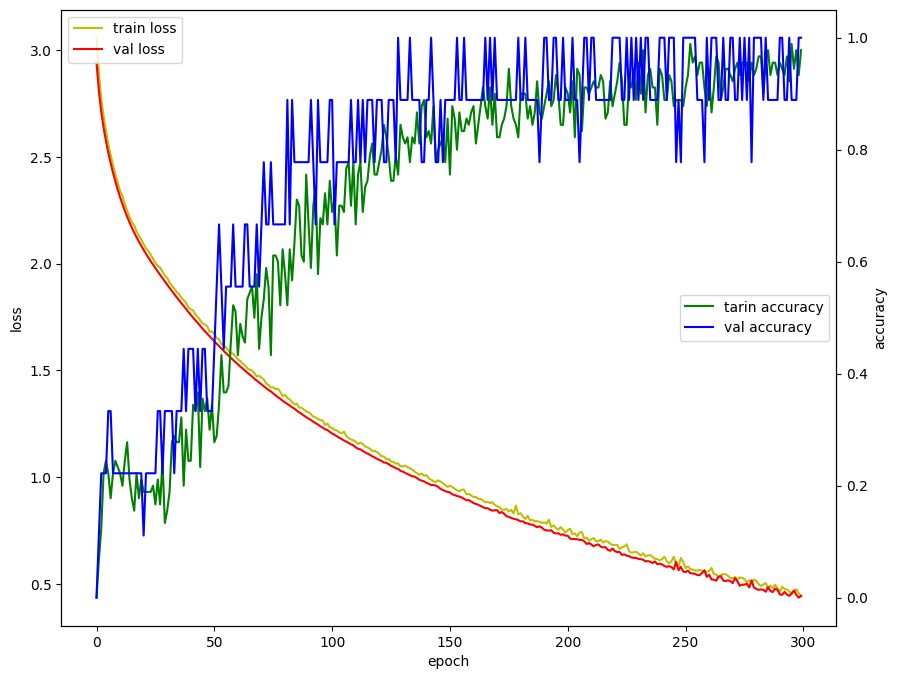

In [85]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'],'g',label='tarin accuracy') # 
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy') # 
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [88]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 1.0000


In [89]:
score # loss, accuracy

[0.44416558742523193, 1.0]

In [91]:
print('평가된 loss', score[0])
print('평가된 accuracy', score[1]*100, '%')

평가된 loss 0.44416558742523193
평가된 accuracy 100.0 %


# 7. 모델 사용하기

In [94]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 21ms/step


array([[9.3232067e-10, 1.0298652e-09, 9.7629271e-02, 2.8901423e-12,
        7.9225510e-01, 9.5572057e-12, 1.0882133e-01, 5.7588979e-11,
        1.2937587e-03, 7.9561288e-11, 4.4566679e-07, 2.4719305e-14,
        7.6192511e-11, 3.5766453e-12, 1.1788559e-13, 1.9129958e-11,
        3.6813884e-18, 3.5687301e-14, 4.6741975e-22]], dtype=float32)

In [95]:
# 분류분석의 예측은 predict결과를 argmax()
model.predict(np.array([[2]])).argmax()

1/1 [==============================] - 0s 22ms/step


4

In [96]:
# 4를 몇%확률로 예측했는지
H[0, H.argmax()]*100

79.22551035881042

# 8. 모델 저장하기

In [100]:
# model.save('./model/02_deep.h5')

from tensorflow.keras.models import save_model
save_model(model,'./model/02_deep.h5')



### 저장된 모델 사용하기

In [101]:
from tensorflow.keras.models import load_model
model2 = load_model('./model/02_deep.h5')

In [102]:
model2.predict(np.array([[4]])).argmax()

1/1 [==============================] - 0s 81ms/step


8